In [26]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

ds = load_dataset("StephanAkkerman/financial-tweets-crypto")

# Read in data

In [27]:

# If the dataset has a 'train' split, load it into pandas
df = pd.DataFrame(ds['train'])

# Display the first few rows of the DataFrame
df.head()

,image_url,proxy_image_url,image_dimensions,thumbnail_url,proxy_thumbnail_url,thumbnail_dimensions,timestamp,description,url,embed_title,tweet_type,financial_info,sentiment
0,https://pbs.twimg.com/media/F-7h_aha8AAd-bI.jpg,https://images-ext-1.discordapp.net/external/W...,"(649, 1200)",https://pbs.twimg.com/profile_images/154295574...,https://images-ext-1.discordapp.net/external/S...,"(48, 48)",2023-11-14T23:06:39.390000+00:00,Crazy that $PRIME is going to >$1B market cap ...,https://twitter.com/user/status/17245642086025...,"Crypto Mikey tweeted about PRIME, AXS",tweet,"[{'ticker': '$PRIME', 'exchanges': [], 'price'...",Bullish
1,https://pbs.twimg.com/media/F-7nxyVWQAAC7Pc.png,https://images-ext-1.discordapp.net/external/N...,"(1200, 573)",https://pbs.twimg.com/profile_images/164958768...,https://images-ext-1.discordapp.net/external/l...,"(48, 48)",2023-11-14T23:31:41.017000+00:00,"Crazy part is, a lot of what I have been tradi...",https://twitter.com/user/status/17245705594498...,Don't follow Shardi B If You Hate Money tweete...,tweet,"[{'ticker': '$MATIC', 'exchanges': ['binance',...",Bullish
2,https://pbs.twimg.com/media/F-7n5h1X0AAeeY7.png,https://images-ext-1.discordapp.net/external/R...,"(1200, 573)",https://pbs.twimg.com/profile_images/164958768...,https://images-ext-1.discordapp.net/external/l...,"(48, 48)",2023-11-14T23:31:45.447000+00:00,$AVAX\n\nStacking on support..,https://twitter.com/user/status/17245707437976...,Don't follow Shardi B If You Hate Money tweete...,tweet,"[{'ticker': '$AVAX', 'exchanges': ['kucoin', '...",Bullish
3,https://pbs.twimg.com/media/F-7oZjbXgAAKIrh.png,https://images-ext-1.discordapp.net/external/Y...,"(1200, 578)",https://pbs.twimg.com/profile_images/164958768...,https://images-ext-1.discordapp.net/external/l...,"(48, 48)",2023-11-14T23:36:39.449000+00:00,$SOL\n\nLFG!!,https://twitter.com/user/status/17245712393085...,Don't follow Shardi B If You Hate Money tweete...,tweet,"[{'ticker': '$SOL', 'exchanges': ['kucoin', 'b...",Bullish
4,https://pbs.twimg.com/media/F-7qKyIaIAAVhRX.png,https://images-ext-1.discordapp.net/external/k...,"(1200, 589)",https://pbs.twimg.com/profile_images/135635956...,https://images-ext-1.discordapp.net/external/Q...,"(48, 48)",2023-11-14T23:46:39.487000+00:00,$INJ - Twitter been super bullish on this one ...,https://twitter.com/user/status/17245734559649...,IncomeSharks tweeted about INJ,tweet,"[{'ticker': '$INJ', 'exchanges': ['binance', '...",Bullish


In [28]:
df.shape

(57935, 13)

In [29]:
df[['timestamp', 'description', 'sentiment', 'url']].head()

,timestamp,description,sentiment,url
0,2023-11-14T23:06:39.390000+00:00,Crazy that $PRIME is going to >$1B market cap ...,Bullish,https://twitter.com/user/status/17245642086025...
1,2023-11-14T23:31:41.017000+00:00,"Crazy part is, a lot of what I have been tradi...",Bullish,https://twitter.com/user/status/17245705594498...
2,2023-11-14T23:31:45.447000+00:00,$AVAX\n\nStacking on support..,Bullish,https://twitter.com/user/status/17245707437976...
3,2023-11-14T23:36:39.449000+00:00,$SOL\n\nLFG!!,Bullish,https://twitter.com/user/status/17245712393085...
4,2023-11-14T23:46:39.487000+00:00,$INJ - Twitter been super bullish on this one ...,Bullish,https://twitter.com/user/status/17245734559649...


# Perform cleaning on labeled column

In [30]:
df['sentiment'].value_counts()

sentiment
Bullish             14083
Bearish              6526
Neutral              5431
Bullish (100.0%)      838
Neutral (78.74%)      782
                    ...  
Neutral (64.77%)        1
Bearish (57.63%)        1
Bearish (62.56%)        1
Bullish (89.77%)        1
Bullish (89.25%)        1
Name: count, Length: 8438, dtype: int64

In [31]:
df['sentiment'].isnull().sum()

np.int64(9243)

In [32]:
# Drop rows with missing sentiment
df = df[~df['sentiment'].isna()]

In [33]:
assert df['sentiment'].isnull().sum() == 0

In [34]:
# merge the sentiments to either Neutral, Bullish, Bearish only
df['sentiment'] = df['sentiment'].str.split().str[0]

In [35]:
df['sentiment'].value_counts()

sentiment
Bullish    29276
Neutral    10329
Bearish     9087
Name: count, dtype: int64

In [36]:
df[df['sentiment']=='Bullish']['description'].sample(10).tolist()

['RT @DominicJamesFx: #BTC A look inside the never ending range.',
 '$ETH Longs hit with the Alameda special today',
 "Key liq levels for $BTC \n\n- $16,550\n- $17,450\n\nW/ CPI & FOMC, wouldn't surprise me if both of these levels get tapped at some point this week",
 "Guys, $APT is going to be a great short eventually but don't be so quick to do it. Trying to short something like this on the first go is like jumping in front of a speeding train. I think waiting for the lower high is a much better play (and safer).",
 '$LINK first DMA 20 tag since $7.50 range',
 'Look at this bullish engulfing daily candle on $ETH',
 'For better or worse, $BTC is simply rangebound here until proven otherwise\n\nA lot of ppl are gonna get chopped to bits',
 "#ADA\n\nbullish accumulation below resistance?\n\nCurrently at a comfortable 20%+ profit since the most recent UCTS 1D Buy signal.\n\nLet's see how it develops.\n\n$ADA",
 "Let's do our weekly #Bitcoin and Altcoin live stream sponsored by @BingXEngl

In [37]:
df[df['sentiment']=='Bearish']['description'].sample(10).tolist()

['#APE on dump watch after losing daily breakout candle support',
 "Don't these kind of data, lot of spoof on most the exchanges \n\n> [@YourFavouriteCT](https://twitter.com/YourFavouriteCT):\n> $Skl \n> Look at this @CryptoNoan \n> Huge bid orders",
 'Shorted #BTC at $24.7k. Aiming for a 3% drop to the downside. \n\nRisking 15% of todays profits.',
 'If buying $BTC at 60K was really dumb and \nbuying BTC at 50K was dumb and \nbuying btc at 30K was smart \nthen buying bitcoin below 20K is really smart.\n\nimo at worst we see a 17K-16K retest then up only.\n\nprove me wrong.',
 'potential 5 down may be complete now, lows swept and new low made, it may go lower but defo time to start protecting short profits imo\n\n#btc',
 'We did a little faddddding  \n\n> [@CryptoGodJohn](https://twitter.com/CryptoGodJohn):\n> $ETH / $BTC leading the market',
 '$ICP #ICP\n\nSame ABC structure. Local Resistance is broken 📈\n\n🎯 T1 - $7.8\n\n📍Main Target Zone: $9.8-10.5',
 'Looks like ppl are giga shorti

In [38]:
df[df['sentiment']=='Neutral']['description'].sample(10).tolist()

['$BTC lots of excitement and FOMO going around for a downtrend yet to close above weekly EMA 8',
 '$ETHUSD - ranges im looking at when new week starts',
 "I'm an #XRP HODL'er\n\n[@Kica333](https://twitter.com/Kica333):\nRuin a first date in four words.",
 '$BTC testing weekly resistance for the 4th time\n\n👀',
 'ZK coins heating up\n\n$MATIC\n$DUSK\n$LRC\n$MINA',
 '$BTC: What will you do if Uptober is a reality?#Bitcoin #BTC',
 '$APT thx Eliz 🤝',
 '$MC',
 "$BTC\n\nTell me again my levels aren't spot on..",
 '$BTC Has generally been reacting pretty well to these daily levels from late 2020/early 2021.\n\nEspecially the $19.8K level has proven as an important level during our current range which has been respected pretty well on LTFs.\n\nTrade here: http://u.primexbt.com/DaanCrypto']

## Preliminary EDA

In [39]:
import re
# Define functions to extract hashtags and mentions
def extract_hashtags(text):
    return ' '.join(re.findall(r'#\w+', text))

def extract_mentions(text):
    return ' '.join(re.findall(r'@\w+', text))

def extract_dollar_phrases(text):
    return ' '.join(re.findall(r'\$\w+', text))

# Apply the functions to the 'description' column
df['hashtags'] = df['description'].apply(extract_hashtags)
df['mentions'] = df['description'].apply(extract_mentions)
df['ticker_symbols'] = df['description'].apply(extract_dollar_phrases)

# Display the first few rows to verify the new columns
df[['description', 'hashtags', 'mentions', 'ticker_symbols']].head()

,description,hashtags,mentions,ticker_symbols
0,Crazy that $PRIME is going to >$1B market cap ...,,,$PRIME $1B $AXS $75
1,"Crazy part is, a lot of what I have been tradi...",,,$MATIC
2,$AVAX\n\nStacking on support..,,,$AVAX
3,$SOL\n\nLFG!!,,,$SOL
4,$INJ - Twitter been super bullish on this one ...,,,$INJ


In [40]:
df['hashtags'].value_counts()

hashtags
                                30011
#Bitcoin                         6374
#BTC                             2065
#Bitcoin #Bitcoin                 443
#btc                              276
                                ...  
#op #TradeWithNoan                  1
#sushi #Sushi #LearnWithNoan        1
#MATIC #Polygon #Matic              1
#Shiba                              1
#ensdomains #domains                1
Name: count, Length: 3092, dtype: int64

In [41]:
df['mentions'].value_counts()

mentions
                                 34121
@CryptoNoan                       1362
@eliz883                           959
@Nebraskangooner                   500
@CryptoGodJohn                     465
                                 ...  
@InvestrInsight @HackermanAce        1
@Trader_XO @eliz883                  1
@notsofast                           1
@GiganticRebirth @GCRClassic         1
@gregosuri @akashnet_                1
Name: count, Length: 3919, dtype: int64

In [42]:
df['ticker_symbols'].value_counts()

ticker_symbols
                          9593
$BTC                      6884
$ETH                      2250
$BTC $BTC                  677
$SOL                       667
                          ... 
$doge $0                     1
$ETH $1315                   1
$FRM                         1
$LINK $7 $9 $LINK $BTC       1
$SUSHI $9                    1
Name: count, Length: 8415, dtype: int64

In [43]:
def agg_multiple_columns(df, agg_col):
    # Split the 'dollar_phrases' column into multiple columns
    df_split = df[agg_col].str.split(expand=True)
    # Melt the DataFrame to transform it into a long format
    df_melted = df_split.melt(value_name=agg_col).dropna()

    # Group by the 'dollar_phrase' and calculate the count
    return df_melted[agg_col].value_counts()


Text(0.5, 1.0, 'Top 10 mentions')

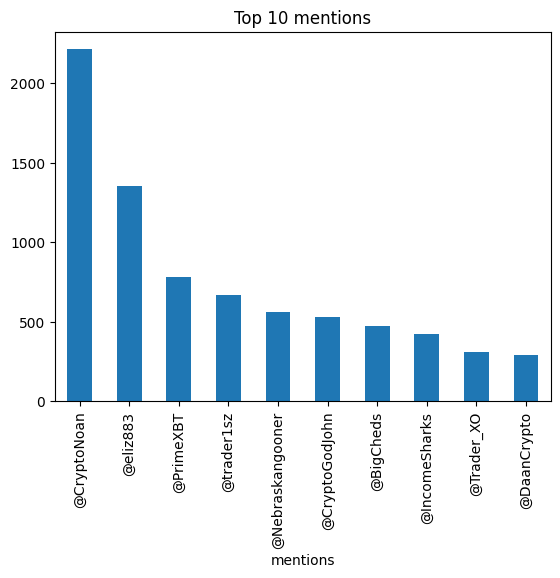

In [44]:
agg_multiple_columns(df, 'mentions').sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 mentions')

In [45]:
# Define a mapping dictionary for normalization
hashtag_mapping = {
    '#Bitcoin': '#BTC',
    '#btc': '#BTC',
    '#bitcoin': '#BTC',
    # Add more mappings as needed
    '#ETH': '#Ethereum',
    '#eth': '#Ethereum',
    '#ethereum': '#Ethereum',

    '#crypto': '#Crypto',
    '#cryptocurrency': '#Crypto',
}

# Function to normalize hashtags
def normalize_hashtags(hashtags):
    return ' '.join([hashtag_mapping.get(tag, tag) for tag in hashtags.split()])

# Apply the normalization function to the 'hashtags' column
df['hashtags'] = df['hashtags'].apply(normalize_hashtags)

# Display the first few rows to verify the changes
df[['description', 'hashtags']].head()

,description,hashtags
0,Crazy that $PRIME is going to >$1B market cap ...,
1,"Crazy part is, a lot of what I have been tradi...",
2,$AVAX\n\nStacking on support..,
3,$SOL\n\nLFG!!,
4,$INJ - Twitter been super bullish on this one ...,


Text(0.5, 1.0, 'Top 10 hashtags')

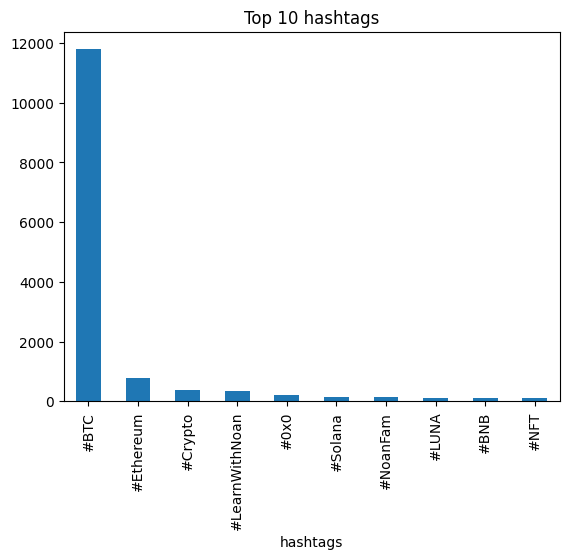

In [46]:
agg_multiple_columns(df, 'hashtags').sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 hashtags')

In [47]:
# import re
# import nltk
# from nltk.corpus import stopwords

# # Convert to lowercase
# df['description'] = df['description'].str.lower()

# # Remove URLs
# df['description'] = df['description'].apply(lambda x: re.sub(r'http\S+', '', x))

# # Remove special characters and numbers
# df['description'] = df['description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# # Remove extra spaces
# df['description'] = df['description'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# # # Remove stopwords (optional, requires nltk)
# nltk.download('stopwords')
# stop = set(stopwords.words('english'))
# df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# # # Display the cleaned descriptions
# # df['description'].head()

In [48]:
# Define a function to check for crypto wallet addresses
def contains_wallet_address(text):
    # Regular expressions for common crypto wallet addresses
    patterns = [
        r'\b[13][a-km-zA-HJ-NP-Z1-9]{25,34}\b',  # Bitcoin
        r'\b0x[a-fA-F0-9]{40}\b',  # Ethereum
        r'\b[r][a-zA-Z0-9]{24,34}\b',  # Ripple
        r'\b[L][a-km-zA-HJ-NP-Z1-9]{26,33}\b',  # Litecoin
        r'\b[D][a-km-zA-HJ-NP-Z1-9]{25,34}\b'  # Dogecoin
    ]
    for pattern in patterns:
        if re.search(pattern, text):
            return True
    return False

# Apply the function to the 'description' column
df['contains_wallet_address'] = df['description'].apply(contains_wallet_address)

# Display rows that contain wallet addresses
df[df['contains_wallet_address']].head()

,image_url,proxy_image_url,image_dimensions,thumbnail_url,proxy_thumbnail_url,thumbnail_dimensions,timestamp,description,url,embed_title,tweet_type,financial_info,sentiment,hashtags,mentions,ticker_symbols,contains_wallet_address
1575,https://pbs.twimg.com/media/GBoQ_GdW0AAyywo.jpg,https://images-ext-1.discordapp.net/external/n...,"(1199, 718)",https://pbs.twimg.com/profile_images/173127281...,https://images-ext-1.discordapp.net/external/H...,"(48, 48)",2023-12-18T12:25:40.938000+00:00,Don't forget to swap your $BBANK -> $FI is liv...,https://twitter.com/user/status/17367243145969...,<:quote_tweet:1130467736133316700> AN₿ESSA quo...,quote tweet,"[{'ticker': '$BBANK', 'exchanges': [], 'price'...",Bullish,,@blockbankapp,$BBANK $FI $FI $BBANK $FI $FI,True
1681,https://pbs.twimg.com/media/GBsb8K_aAAAXhHj.jpg,https://images-ext-1.discordapp.net/external/N...,"(1001, 456)",https://pbs.twimg.com/profile_images/163481495...,https://images-ext-1.discordapp.net/external/a...,"(48, 48)",2023-12-19T09:00:25.013000+00:00,+135% 😍🚀 a sniper entry and a quick gain... Do...,https://twitter.com/user/status/17370340437351...,<:quote_tweet:1130467736133316700> Prof.Noan.A...,quote tweet,"[{'ticker': '$MOAI', 'exchanges': [], 'price':...",Bullish,#Degen #MotionAI #Blockchain,@CryptoNoanGemz @CryptoNoanGemz @motionaieth @...,$ETH $MOAI,True
1867,https://pbs.twimg.com/media/GB0uy64bIAAEloq.jpg,https://images-ext-1.discordapp.net/external/l...,"(975, 549)",https://pbs.twimg.com/profile_images/162406583...,https://images-ext-1.discordapp.net/external/z...,"(48, 48)",2023-12-20T22:33:58.193000+00:00,"Im gonna hold onto my $hood, it already did 2x...",https://twitter.com/user/status/17376012784636...,<:quote_tweet:1130467736133316700> Ace quote t...,quote tweet,"[{'ticker': '$HOOD', 'exchanges': [], 'price':...",Bullish,,@wagmicatgirl,$hood $eth $sol $HOOD,True
2098,https://pbs.twimg.com/media/GB9DM9JXAAAKPkl.jpg,https://images-ext-1.discordapp.net/external/6...,"(1200, 675)",https://pbs.twimg.com/profile_images/169231943...,https://images-ext-1.discordapp.net/external/j...,"(48, 48)",2023-12-23T08:27:25+00:00,Glad to be investor in this one. Think it will...,https://twitter.com/user/status/17384761468853...,<:quote_tweet:1130467736133316700> WIZZ🥷 ( bew...,quote tweet,"[{'ticker': '$AIT', 'exchanges': [], 'price': ...",Bullish,#Uniswap,@AITProtocol @AITProtocol,$AIT,True
8606,https://pbs.twimg.com/media/F-ugRSxWgAAxWrI.jpg,https://images-ext-1.discordapp.net/external/9...,"(1065, 725)",https://pbs.twimg.com/profile_images/163481495...,https://images-ext-2.discordapp.net/external/a...,"(48, 48)",2023-11-12T10:33:24.016000+00:00,One of the most hyped tokens $drop #drop is li...,https://twitter.com/user/status/17236494562041...,Prof.Noan.Ai 𓃵 tweeted about DROP,tweet,"[{'ticker': '$DROP', 'exchanges': [], 'price':...",Bearish,#drop,,$drop,True


TODO: The question to answer is whether we could just the simplest approach by
1. considering each words as one features 
2. Features such as the occurrence of hashtags etc
to achieve a **baseline** performance

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Convert to lowercase
df['clean_description'] = df['description'].str.lower()

# Remove hashtags and the words following them
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'#\w+', '', x))

# Remove dollar 
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'\$\w+', '', x))

# Remove mention 
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'@\w+', '', x))

# Remove URLs
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove special characters and numbers
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Remove extra spaces
df['clean_description'] = df['clean_description'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


# # Remove stopwords (optional, requires nltk)
nltk.download('stopwords')
stop = set(stopwords.words('english'))
df['clean_description'] = df['clean_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# # Display the cleaned 
df['clean_description'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kexinchong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    crazy going market cap next cycle top cycle st...
1                         crazy part lot trading still
2                                     stacking support
3                                                  lfg
4    twitter super bullish one first real pullback ...
Name: clean_description, dtype: object

In [53]:
df[['description', 'clean_description']]

,description,clean_description
0,Crazy that $PRIME is going to >$1B market cap ...,crazy going market cap next cycle top cycle st...
1,"Crazy part is, a lot of what I have been tradi...",crazy part lot trading still
2,$AVAX\n\nStacking on support..,stacking support
3,$SOL\n\nLFG!!,lfg
4,$INJ - Twitter been super bullish on this one ...,twitter super bullish one first real pullback ...
...,...,...
57930,"@ShardiB2 $LTC, $NEO, $EOS terrible investment",terrible investment
57931,How are the $LTC maxi’s holding up?,maxis holding
57932,$BITO looks like it may have found a bottom,looks like may found bottom
57933,$SUSHI - $9’s tagged \n\nLovely setup - easy ...,tagged lovely setup easy trigger entry invalid...


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Extract features and labels
X = df['clean_description']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6976075572440702
Classification Report:
              precision    recall  f1-score   support

     Bearish       0.62      0.44      0.52      1828
     Bullish       0.76      0.81      0.78      5900
     Neutral       0.56      0.61      0.58      2011

    accuracy                           0.70      9739
   macro avg       0.65      0.62      0.63      9739
weighted avg       0.69      0.70      0.69      9739



In [58]:
df_test = pd.DataFrame({'description': X_test, 'sentiment': y_test, 'predicted_sentiment': y_pred})
df_test[df_test['predicted_sentiment']!=df_test['sentiment']]

,description,sentiment,predicted_sentiment
37608,bought quick morning dip c adobe covid lows av...,Neutral,Bullish
55748,time prepare king swing long keep sights im lo...,Bullish,Neutral
21000,climbing declining volume,Bullish,Neutral
31203,h scenario im watching,Bullish,Neutral
9885,fucc trash muh feed blocked mentally prepared,Bearish,Neutral
...,...,...,...
39237,got short little head shoulders breaking low t...,Bullish,Bearish
38220,bounce time soon trader tweeted chart stating ...,Bullish,Neutral
55962,low time frame bulls dont want see h evening s...,Bearish,Bullish
41619,anthony scaramucci former white house communic...,Neutral,Bullish


In [68]:
for idx, row in df_test[(df_test['predicted_sentiment']!=df_test['sentiment']) &
                        (df_test['description']!='')
                        ].sample(20).iterrows():
    print(f'Actual Sentiment: {row["sentiment"]}. Predicted Sentiment: {row["predicted_sentiment"]}')
    print(f'Description: {row["description"]}')
    print()

Actual Sentiment: Bearish. Predicted Sentiment: Neutral
Description: ugly h close

Actual Sentiment: Bearish. Predicted Sentiment: Bullish
Description: ydays dump looks fckin horrendous lol

Actual Sentiment: Bearish. Predicted Sentiment: Bullish
Description: w flash crash green swift buy back last week closed within red horizontal good horizontal key hold support major resistance much confluence think itll top year

Actual Sentiment: Bullish. Predicted Sentiment: Bearish
Description: chart curling back big news way recent listed bybit selling atleast

Actual Sentiment: Bearish. Predicted Sentiment: Neutral
Description: according jpy chart main challenging area

Actual Sentiment: Bearish. Predicted Sentiment: Bullish
Description: continues struggle downtrend would love see break soon support box tested

Actual Sentiment: Bearish. Predicted Sentiment: Neutral
Description: shorted

Actual Sentiment: Bullish. Predicted Sentiment: Neutral
Description: buckle going

Actual Sentiment: Bearis

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Combine the text from 'hashtags', 'mentions', and 'ticker_symbols' into a single feature
df['combined_features'] = df['hashtags'] + ' ' + df['mentions'] + ' ' + df['ticker_symbols']

# Extract features and labels
X_combined = df['combined_features']
y = df['sentiment']

# Split the data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using CountVectorizer
vectorizer_combined = CountVectorizer()
X_train_combined_vec = vectorizer_combined.fit_transform(X_train_combined)
X_test_combined_vec = vectorizer_combined.transform(X_test_combined)

# Train a Logistic Regression model
model_combined = LogisticRegression(max_iter=1000)
model_combined.fit(X_train_combined_vec, y_train_combined)

# Make predictions
y_pred_combined = model_combined.predict(X_test_combined_vec)

# Evaluate the model
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
report_combined = classification_report(y_test_combined, y_pred_combined)

print(f'Accuracy: {accuracy_combined}')
print('Classification Report:')
print(report_combined)

Accuracy: 0.6007803675942088
Classification Report:
              precision    recall  f1-score   support

     Bearish       0.38      0.05      0.08      1828
     Bullish       0.61      0.96      0.75      5900
     Neutral       0.37      0.06      0.10      2011

    accuracy                           0.60      9739
   macro avg       0.45      0.35      0.31      9739
weighted avg       0.52      0.60      0.49      9739



# Preliminary Analysis Results

## 1. Data Quality Issues
- Label columns contain noisy labels requiring curation

## 2. Baseline Models Performance

### 2.1 Logistic Regression with Word Count Features
**Preprocessing Steps:**
1. Lowercasing
2. Removing hashtags
3. Removing dollar signs
4. Removing mentions
5. Removing URLs
6. Removing special characters and numbers
7. Removing extra spaces

**Result:** 70% accuracy

### 2.2 Minimal Feature Model
Using only hashtags + ticker_symbols + mentions
**Result:** 60% accuracy

## 3. Error Analysis (for Logistic Regression)

### 3.1 Contextual Understanding Issues
- ❌ Poor handling of crypto trading context
- ❌ Misinterpretation of trading jargon
  - Examples: "shorted", "pump vibes", "divergence"
- ❌ Confusion with technical terms
  - Examples: "support", "resistance", "retracement"

### 3.2 Language Complexity Issues
- ❌ Failed sarcasm detection
  - Example: "looks fckin horrendous lol"
- ❌ Limited domain knowledge integration
- ❌ Poor handling of informal language

### 3.3 Technical Limitations
- ❌ Overemphasis on word polarity
  - Example: "Dumping to the moon 🚀" 
    - Model: Bearish (due to "dumping")
    - Actual: Bullish (crypto slang for rapid price increase)
- ❌ Missing market context

## 4. Conclusion
The analysis highlights the need for contextual models (e.g., BERT) that can better capture:
- Domain-specific language
- Market context
- Sentiment nuances in trading discussions